In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

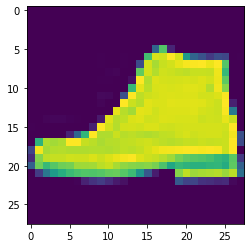

In [9]:
plt.imshow(training_images[42])

In [10]:
training_images[42]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  82, 187,  26,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
#Normalizing the data

training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [12]:
#Building model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # As image size is 28 X 28
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Number of classes (or) labels
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [22]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [23]:
model.fit(training_images, training_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1998 - acc: 0.9242
Epoch 2/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1939 - acc: 0.9276
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1916 - acc: 0.9293
Epoch 4/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1843 - acc: 0.9299
Epoch 5/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1799 - acc: 0.9330
Epoch 6/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1748 - acc: 0.9347
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1720 - acc: 0.9359
Epoch 8/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1680 - acc: 0.9360
Epoch 9/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1619 - acc: 0.9391
Epoch 10/20
60000/60000 [==============================] - 

In [24]:
model.evaluate(testing_images, testing_labels)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.4294 - acc: 0.8900


[0.4294365342020989, 0.89]

In [30]:
# Using callbacks to terminate the training whenever required

class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4):
            self.model.stop_training = True

In [31]:
callbacks = myCallbacks()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # As image size is 28 X 28
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax) # Number of classes (or) labels
])

model.compile(optimizer=tf.train.AdamOptimizer(),
             loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4976 - acc: 0.8232
Epoch 2/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3740 - acc: 0.8650
